# Aprendizaje Automático
# Tarea 2 - Modelado

Profesor: Felipe Meza

Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Estudiantes:

1. Sophia Contreras
2. Yoksan Varela
3. Mauro Víquez

Lista de las librerias por ser usadas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from random import randrange

## Problema por resolver
Modelar la calidad del vino de tinto del norte de Portugal, solamente basandose en resultados de las pruebas fisico quimicas de los mismos. El dataset original se encuentra en el siguiente enlance: https://archive.ics.uci.edu/dataset/186/wine+quality

### Primera Parte: Analisis exploratorio y pre-procesado de set de datos

Inicialmente, se importa el set de datos con las informacion de los vinos tintos del estudio (el .csv en uso se va a importar desde una copia local en GitHub)

In [2]:
redWine_dataset = pd.read_csv("https://raw.githubusercontent.com/YoksanVC/TEC_DataScienceCert/main/Module_2_AprendizajeAutomatico/Tarea2/Datasets/winequality-red.csv", header=0, delimiter=';')
redWine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Analizando la forma del set de datos con el que vamos a trabajar:

In [3]:
redWine_dataset.shape

(1599, 12)

Se cuenta con 1599 instancias y 12 atributos. Verificando que no hayan valores nulos en el set de datos antes de continuar con el analisis exploratorio:

In [4]:
redWine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Se confirma que no tenemos valores Nulos que tengamos que trabajar. Ahora, verifiquemos que todas la instancias en un formato numerico intepretable por los modelos.

In [80]:
for instancia in redWine_dataset:
    print(f"El tipo del atributo {instancia} es {redWine_dataset[instancia].dtype}")

El tipo del atributo fixed acidity es float64
El tipo del atributo volatile acidity es float64
El tipo del atributo citric acid es float64
El tipo del atributo residual sugar es float64
El tipo del atributo chlorides es float64
El tipo del atributo free sulfur dioxide es float64
El tipo del atributo total sulfur dioxide es float64
El tipo del atributo density es float64
El tipo del atributo pH es float64
El tipo del atributo sulphates es float64
El tipo del atributo alcohol es float64
El tipo del atributo quality es float64


Todas la instancias son de tipo flotante o integer, por lo que no es necesario hacer un remapeo y no habra problema con los algoritmos. Como lo que interesa es modelar la calidad de los vinos, nuestras clases va a ser la columna "quality". Veamos su distribucion:

Con esta distribucion se nota un problema: hay un desbalance entre la calidad de los vinos, ya que se tienen muchos datos de calidad entre 5 y 6 pero pocos de los demas. Se procede a balancear los datos para tener una distribucion mas balanceada entre la calidad; pero antes de empezar con esta parte, se procede a Normalizar (dado que hay una variacion considerable entre los atributos) y Estandarizar (para centrarlos) los datos.

In [6]:
# Normalizacion, limitando a 6 decimales
for instancia in redWine_dataset:
    minValue = redWine_dataset[instancia].min()
    maxValue = redWine_dataset[instancia].max()
    redWine_dataset[instancia] = (((redWine_dataset[instancia] - minValue)/(maxValue - minValue))).round(6)
    
# Estandarizacion, limitando a 6 decimales
for instancia in redWine_dataset:
    mean = np.mean(redWine_dataset[instancia])
    std = np.std(redWine_dataset[instancia])
    redWine_dataset[instancia] = ((redWine_dataset[instancia] - mean)/(std)).round(6)
    redWine_dataset[instancia].round(6)

redWine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528357,0.961875,-1.391472,-0.453220,-0.243703,-0.466194,-0.379132,0.558277,1.288642,-0.579203,-0.960247,-0.787823
1,-0.298546,1.967443,-1.391472,0.043413,0.223880,0.872636,0.624366,0.028259,-0.719932,0.128951,-0.584775,-0.787823
2,-0.298546,1.297064,-1.186070,-0.169431,0.096354,-0.083671,0.229044,0.134267,-0.331176,-0.048087,-0.584775,-0.787823
3,1.654857,-1.384444,1.484154,-0.453220,-0.264964,0.107590,0.411503,0.664277,-0.979103,-0.461177,-0.584775,0.450848
4,-0.528357,0.961875,-1.391472,-0.453220,-0.243703,-0.466194,-0.379132,0.558277,1.288642,-0.579203,-0.960247,-0.787823


Ya con los datos normalizados y estandarizados, vamos a analizar nuevamente la distribucion de la calidad.

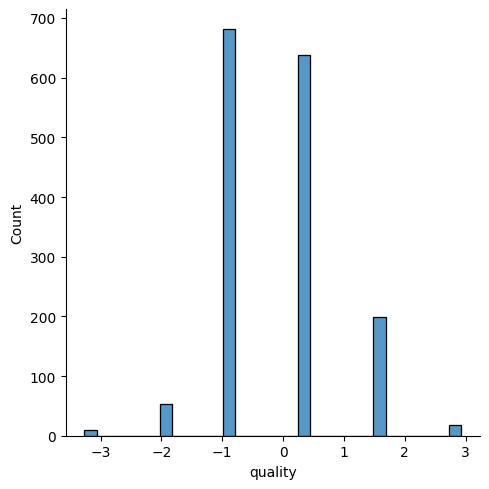

In [7]:
sns.displot(redWine_dataset, x="quality")

Veamos cual es la cuenta exacta por valor en la columna de calidad:

In [8]:
print(redWine_dataset['quality'].value_counts())

quality
-0.787823    681
 0.450848    638
 1.689519    199
-2.026494     53
 2.928190     18
-3.265165     10
Name: count, dtype: int64


Hay 3 calidades que tienen muchos datos: -0.787823, 0.450848 y 1.689519. Se procede a crear una funcion que recibe como parametros: un dataframe (obligatorio), el valor con el que se desea hacer el filtro (obligatorio) y la cantidad total de isntancias deseadas con el fin de realizar un sub-muestreo de esos valores (opcional con un valor por defecto de 100).

In [75]:
def subsampling(dataframe_ori, filter, sampling_limit=100):
    dataframe = dataframe_ori.copy()
    limit_counter = 0
    for i in range(dataframe.shape[0]):
        if (dataframe['quality'][i] == filter):
            if (limit_counter < sampling_limit):
                randNumber = randrange(1,10)
                if (dataframe.loc[i,'quality'] == filter and randNumber <= 4): # Probabilidad de un 40% de mantenerse
                    limit_counter += 1
                else:
                    dataframe.loc[i,'quality'] = pd.NA
            else:
                dataframe.loc[i,'quality'] = pd.NA
    return dataframe


Creando una copia del set datos para conservar los datos originales:

In [76]:
redWine_dataset_trimmed = redWine_dataset.copy()
redWine_dataset_trimmed.shape

(1599, 12)

Se realiza el sub-muestreo con la funcion subsampling y verificamos la cantidad de datos final:

In [77]:
# Sub-muestreo usando la fincion de subsampling
redWine_dataset_trimmed = subsampling(redWine_dataset_trimmed,-0.787823,100)
redWine_dataset_trimmed = subsampling(redWine_dataset_trimmed,0.450848,100)
redWine_dataset_trimmed = subsampling(redWine_dataset_trimmed,1.689519,100)

# Removiendo todos los NaN
redWine_dataset_trimmed.dropna(inplace=True)

redWine_dataset_trimmed.shape

(368, 12)

Ahora, hacemos histograma para confirmar que se alcanzado un mejor balance; aunque cabe la pena rescatar que pasamos de mas de 1000 instancias a 368, lo cual podria provocar un problema de under-fitting.

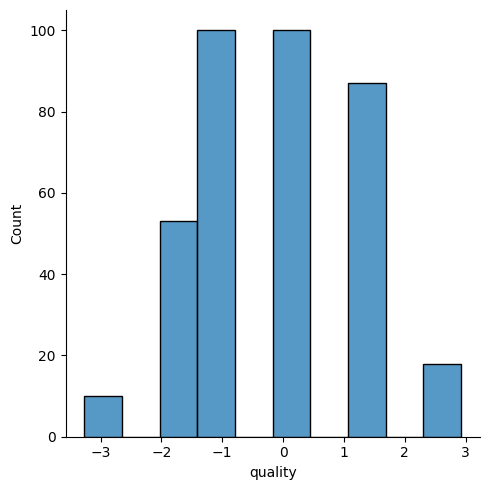

In [78]:
sns.displot(redWine_dataset_trimmed, x="quality")

Se confirma que se tiene un mejor balance. Ya con esto completo, vamos a hacer una revision de los atributos. Hay 12 atributos por analizar, por lo que deberiamos hacer un descarte de algunos para simplificar el modelo. Vamos a crear 3 nuevos data sets, con 4 atributos cada uno, para luego analizar las densidades de cada grupo (lo hacemos con densidades para no hacer una comparacion de datos directa dado que las cantidades son distintas):

In [106]:
df_grupo1 = redWine_dataset_trimmed[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']]
df_grupo2 = redWine_dataset_trimmed[['chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density']]
df_grupo3 = redWine_dataset_trimmed[['pH', 'sulphates','alcohol']]

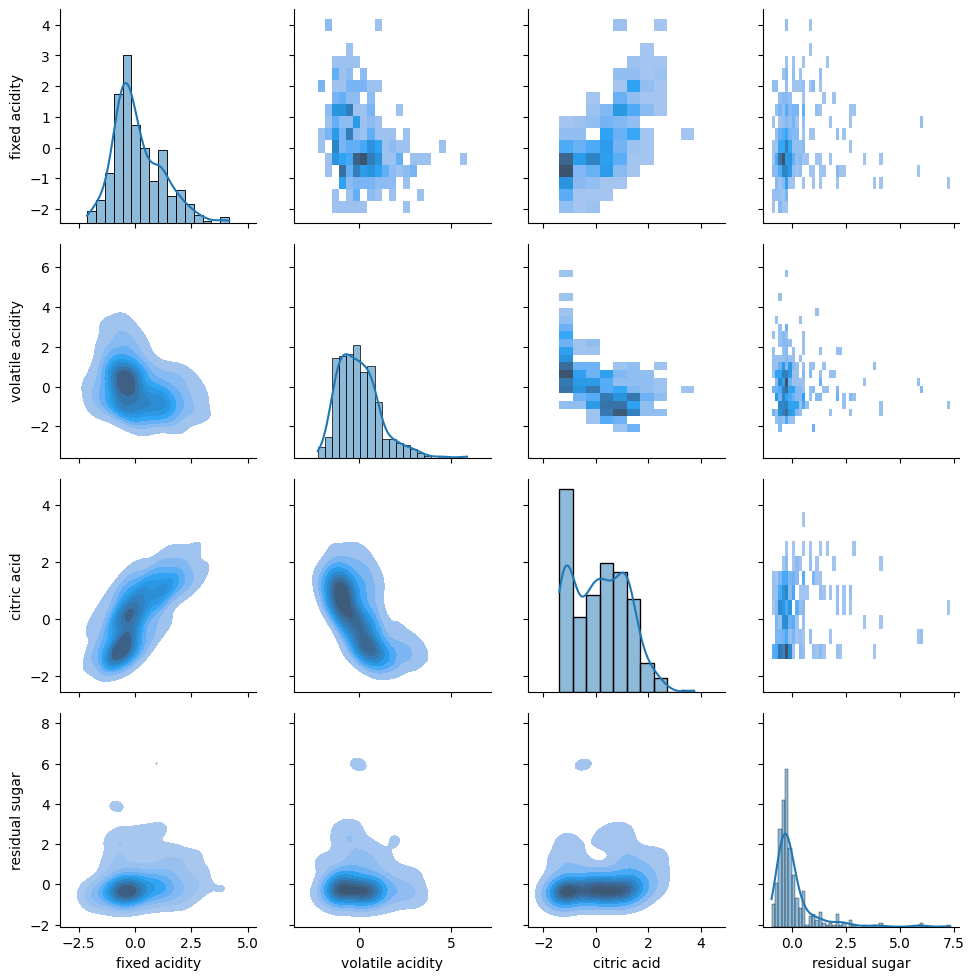

In [108]:
g = sns.PairGrid(df_grupo1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

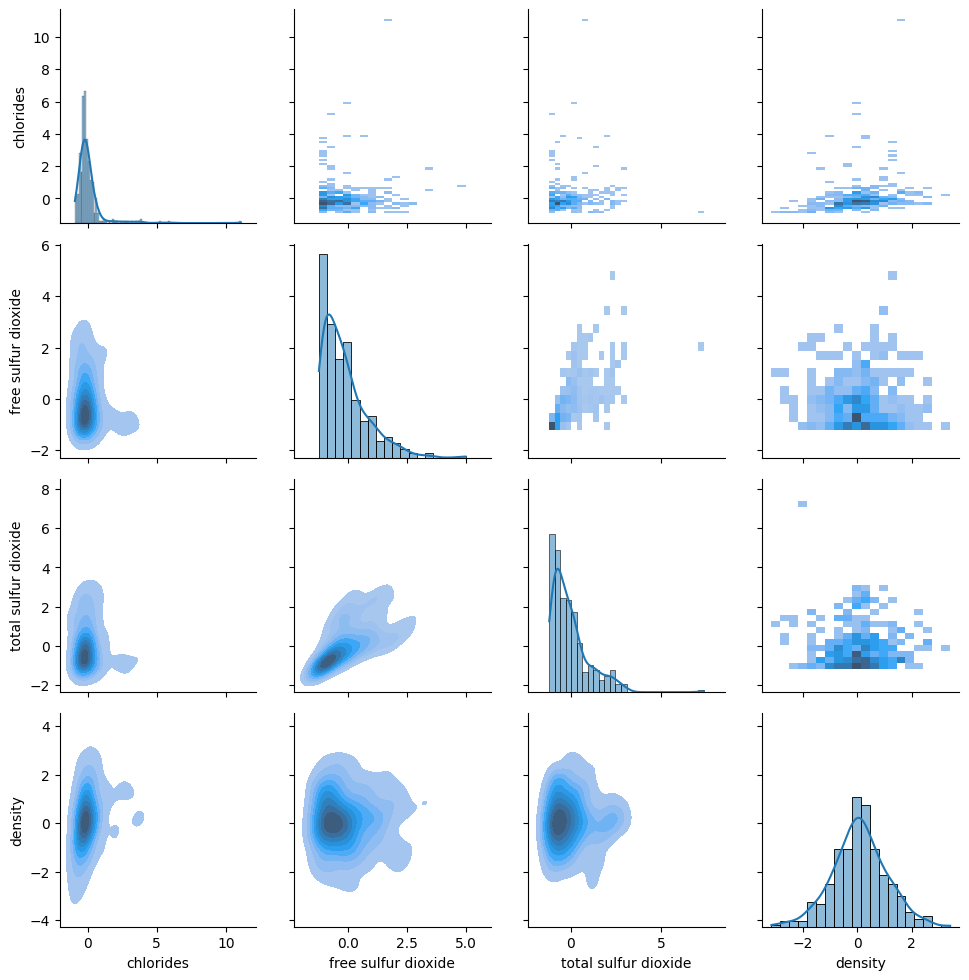

In [109]:
g = sns.PairGrid(df_grupo2)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

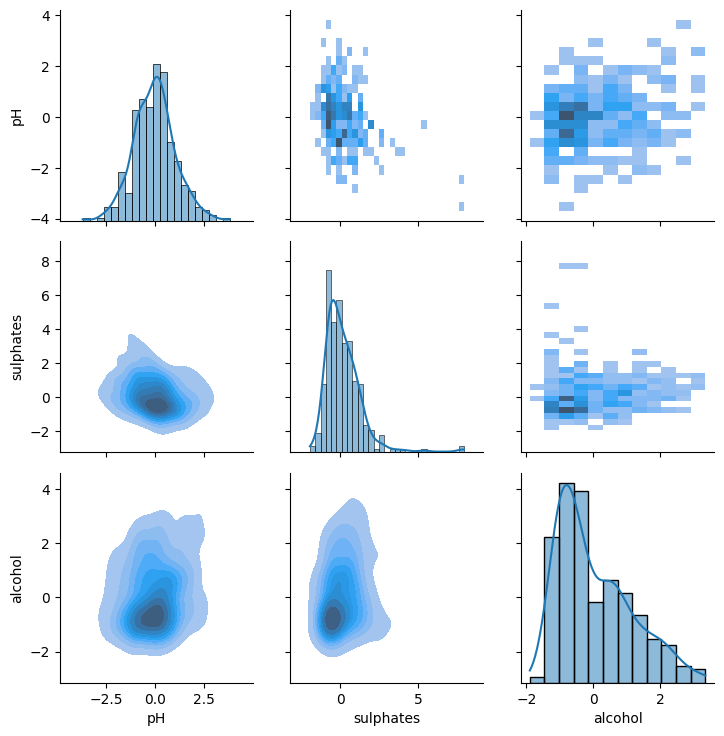

In [110]:
g = sns.PairGrid(df_grupo3)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

Despues de analizar cada grupo, podemos llegar a las siguientes conclusiones:
- El set de datos fue sometido a un sub-muestredo de la calidad, la cual sigue una distribucion normal. Algunos de los atributos no siguen una distribucion normal, tienen skewness muy pronunciados hacia la derecha, lo cual sugiere que esos atributos no podrian ser afectar mucho la calidad del vino.
- Otros atributos si muestran una distribucion bastante normal, lo que los convierte en candidatos para poder usados en el modelo de regresion.

Por lo tanto, los atributos seleccionados para crear el modelo son: *fixed acidity, density, pH y alcohol*

### Segunda Parte: Modelado y medicion de rendimiento del modelo